In [1]:
import pandas as pd # imports
import numpy as np
import math
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [2]:
CASES_FILE = 'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv' # constants
VACCINATIONS_FILE = 'COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv'
STATES = ['MI', 'MO']
MI = 0
MO = 1
CASES_OUTLIER_COLS = ['new_case', 'new_death']
VACCINE_OUTLIER_COLS = ['Distributed', 'Administered']

In [3]:
def format_data(cases_file, vaccines_file, states): # reads from files and returns array of dicts containing vaccination and case data for each state eac
    cases = pd.read_csv(cases_file)
    vaccines = pd.read_csv(vaccines_file)
    state_data = []
    cases.fillna(0, inplace=True)
    cases['submission_date'] = pd.to_datetime(cases['submission_date'])
    cases.sort_values(by='submission_date', inplace=True)
    vaccines.fillna(0, inplace=True)
    vaccines['Date'] = pd.to_datetime(vaccines['Date'])
    vaccines.sort_values(by='Date', inplace=True)
    for i in range(len(states)):
        state_cases = cases[cases['state'] == states[i]]
        state_vaccines = vaccines[vaccines['Location'] == states[i]]
        state_vaccines['Administered'] = state_vaccines['Administered'].diff()
        state_vaccines['Admin_Per_100K'] = state_vaccines['Admin_Per_100K'].diff()
        state_data.append({'cases': state_cases, 'vaccinations': state_vaccines})
    return state_data


def get_tukey_range(col): # returns upper and lower tukey threshold based on column
    col = sorted(col)
    n = len(col)
    q1 = col[int(np.ceil(n/4))]
    q3 = col[int(np.ceil(3*(n/4)))]
    iqr = q3 - q1
    return q1 - (iqr*1.5), q3 + (iqr*1.5)


def remove_outliers(data, cols, s): # removes rows in df if value in column is an outlier
    for i in range(len(cols)):
        low, hi = get_tukey_range(data[cols[i]])
        init_rows = len(data[cols[i]])
        data.drop(data[(data[cols[i]] < low) | (data[cols[i]] > hi)].index, inplace=True)
        filtered_rows = len(data[cols[i]])
        #print("%s: low = %d, hi = %d, removed = %d from col %s" % (s, low, hi, init_rows-filtered_rows, cols[i]))

        
def part1():   
    state_data = format_data(CASES_FILE, VACCINATIONS_FILE, STATES)
    for i in range(len(state_data)):
        remove_outliers(state_data[i]['cases'], CASES_OUTLIER_COLS, "cases" + str(STATES[i]))
        remove_outliers(state_data[i]['vaccinations'], VACCINE_OUTLIER_COLS, "vaccinations" + str(STATES[i]))
    for i in range(len(state_data)):
        print("%s cases dataset with cleaned outliers" % STATES[i])
        display(state_data[i]['cases'])
        print("%s vaccination dataset with cleaned outliers" % STATES[i])
        display(state_data[i]['vaccinations'])
    return state_data
    
    
state_data = part1()

MI cases dataset with cleaned outliers


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
33200,2020-01-22,MI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree
10872,2020-01-23,MI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree
32662,2020-01-24,MI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree
15389,2020-01-25,MI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree
27359,2020-01-26,MI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16582,2022-05-06,MI,2444891,2127459.0,317432.0,0,0.0,36064,33178.0,2886.0,0,0.0,05/07/2022 01:19:57 PM,Agree,Agree
18441,2022-05-07,MI,2444891,2127459.0,317432.0,0,0.0,36064,33178.0,2886.0,0,0.0,05/09/2022 01:14:40 PM,Agree,Agree
26813,2022-05-08,MI,2444891,2127459.0,317432.0,0,0.0,36064,33178.0,2886.0,0,0.0,05/09/2022 02:22:50 PM,Agree,Agree
18204,2022-05-09,MI,2444891,2127459.0,317432.0,0,0.0,36064,33178.0,2886.0,0,0.0,05/10/2022 01:23:16 PM,Agree,Agree


MI vaccination dataset with cleaned outliers


,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,Distributed_Per_100k_65Plus,Administered,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf,Admin_Per_100K,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus,Recip_Administered,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Series_Complete_Janssen,Series_Complete_Moderna,Series_Complete_Pfizer,Series_Complete_Unk_Manuf,Series_Complete_Janssen_12Plus,Series_Complete_Moderna_12Plus,Series_Complete_Pfizer_12Plus,Series_Complete_Unk_Manuf_12Plus,Series_Complete_Janssen_18Plus,Series_Complete_Moderna_18Plus,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Additional_Doses,Additional_Doses_Vax_Pct,Additional_Doses_12Plus,Additional_Doses_12Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus
33135,2020-12-14,51,MI,3900,0,0,0,0,39,0,0,0,NaN,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33105,2020-12-15,51,MI,4875,0,0,0,0,49,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33019,2020-12-16,51,MI,9750,0,0,0,0,98,0,0,0,5.0,0,0,0,0,0,5,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32984,2020-12-17,51,MI,84825,0,0,0,0,849,0,0,0,239.0,0,0,0,0,0,244,0,2.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32916,2020-12-18,51,MI,84825,0,0,0,0,849,0,0,0,832.0,0,0,0,0,0,1076,0,9.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2022-05-07,18,MI,21440910,942800,8503120,11994990,0,214691,249458,273379,1214510,12180.0,15489611,14632058,4636752,466670,6282210,9195708,2212,122.0,180216,186564,262646,16260975,6694299,67.0,6453161,75.1,6060247,77.3,1706118,95.0,6014066,60.2,5801415,67.5,5445565,69.4,1558993,88.3,4215

MO cases dataset with cleaned outliers


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
16198,2020-01-22,MO,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
30979,2020-01-23,MO,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
13427,2020-01-24,MO,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
18381,2020-01-25,MO,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
31431,2020-01-26,MO,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,2022-05-06,MO,1428117,0.0,0.0,2491,0.0,20382,0.0,0.0,22,0.0,05/07/2022 01:19:57 PM,Not agree,Not agree
14634,2022-05-07,MO,1428117,0.0,0.0,0,0.0,20382,0.0,0.0,0,0.0,05/09/2022 01:14:40 PM,Not agree,Not agree
16202,2022-05-08,MO,1428117,0.0,0.0,0,0.0,20382,0.0,0.0,0,0.0,05/09/2022 02:22:50 PM,Not agree,Not agree
18558,2022-05-09,MO,1428117,0.0,0.0,0,0.0,20382,0.0,0.0,0,0.0,05/10/2022 01:23:16 PM,Not agree,Not agree


MO vaccination dataset with cleaned outliers


,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,Distributed_Per_100k_65Plus,Administered,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf,Admin_Per_100K,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus,Recip_Administered,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Series_Complete_Janssen,Series_Complete_Moderna,Series_Complete_Pfizer,Series_Complete_Unk_Manuf,Series_Complete_Janssen_12Plus,Series_Complete_Moderna_12Plus,Series_Complete_Pfizer_12Plus,Series_Complete_Unk_Manuf_12Plus,Series_Complete_Janssen_18Plus,Series_Complete_Moderna_18Plus,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Additional_Doses,Additional_Doses_Vax_Pct,Additional_Doses_12Plus,Additional_Doses_12Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus
33133,2020-12-14,51,MO,10725,0,0,0,0,175,0,0,0,NaN,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33078,2020-12-15,51,MO,45825,0,0,0,0,747,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32996,2020-12-16,51,MO,45825,0,0,0,0,747,0,0,0,886.0,0,0,0,0,0,886,0,14.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32936,2020-12-17,51,MO,51675,0,0,0,0,842,0,0,0,1537.0,0,0,0,0,1,2422,0,25.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32887,2020-12-18,51,MO,51675,0,0,0,0,842,0,0,0,3083.0,0,0,0,0,3,5503,0,51.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2022-05-07,18,MO,11718105,429000,4472860,6816245,0,190929,223811,245825,1103360,5959.0,8734671,8242998,2617841,251837,3247778,5474866,2324,97.0,166829,172924,246492,8945534,4065870,66.2,3929250,75.0,3685741,77.3,1021996,95.0,3444921,56.1,3339046,63.8,3132148,65.7,898743,

Combined new case data between MI and MO -------------------------------------------------------

Posterior MAP after week 5: 1956.04
Posterior MAP after week 6: 2170.37
Posterior MAP after week 7: 2303.14
Posterior MAP after week 8: 2312.17


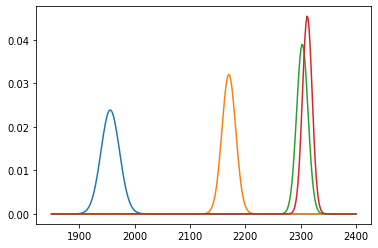

Combined new death data between MI and MO ------------------------------------------------------

Posterior MAP after week 5: 13.4688
Posterior MAP after week 6: 14.018
Posterior MAP after week 7: 14.2836
Posterior MAP after week 8: 15.6389


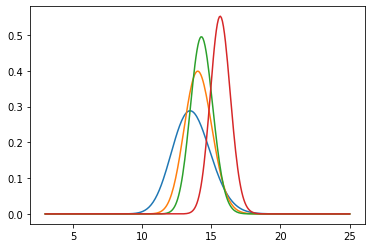

In [4]:
def get_rows_in_date_range(state_data, start_date, end_date): # returns a copy of df containing rows between specified date range
    filtered_data = []
    for i in range(len(state_data)):
        cases_data = state_data[i]['cases']
        vaccine_data = state_data[i]['vaccinations']
        filtered_data.append({'cases': cases_data[(cases_data['submission_date'] >= start_date) & (cases_data['submission_date'] <= end_date)],
                             'vaccinations': vaccine_data[(vaccine_data['Date'] >= start_date) & (vaccine_data['Date'] <= end_date)]})
    return filtered_data


def compute_posterior(data, prior_alpha, prior_beta, wk):
    n = len(data)
    data_sum = np.sum(data)
    posterior_alpha = prior_alpha + data_sum
    posterior_beta = prior_beta + n
    print("Posterior MAP after week %g: %g" % ((wk, (posterior_alpha-1)/posterior_beta)))
    return posterior_alpha, posterior_beta


def plot_gamma(alpha, beta, x_min, x_max):
    x = np.linspace(x_min, x_max, 300)
    y = stats.gamma.pdf(x, a=alpha, scale=1/beta)
    plt.plot(x,y)

    
def do_bayesian(data, expo_mean, x_min, x_max, s):
    prior_alpha5 = 1 # set alpha = 1 in gamma distribution to get exp distribution
    prior_beta5 = 1.0/expo_mean
    
    #plot_gamma(prior_alpha5, prior_beta5)
    
    posterior_alpha5, posterior_beta5 = compute_posterior(data[28:35], prior_alpha5, prior_beta5, 5)
    prior_alpha6, prior_beta6 = posterior_alpha5, posterior_beta5
    plot_gamma(prior_alpha6, prior_beta6, x_min, x_max)
    
    posterior_alpha6, posterior_beta6 = compute_posterior(data[35:42], prior_alpha6, prior_beta6, 6)
    prior_alpha7, prior_beta7 = posterior_alpha6, posterior_beta6
    plot_gamma(prior_alpha7, prior_beta7, x_min, x_max)

    posterior_alpha7, posterior_beta7 = compute_posterior(data[42:50], prior_alpha7, prior_beta7, 7)
    prior_alpha8, prior_beta8 = posterior_alpha7, posterior_beta7
    plot_gamma(prior_alpha8, prior_beta8, x_min, x_max)
    
    posterior_alpha8, posterior_beta8 = compute_posterior(data[50:58], prior_alpha8, prior_beta8, 8)
    plot_gamma(posterior_alpha8, posterior_beta8, x_min, x_max)
    
    plt.show()

    
def part2c():
    jun_data = get_rows_in_date_range(state_data, '2020-6-01', '2020-7-30')
    combined_cases = []
    combined_deaths = []
    for indexMI, rowMI in jun_data[MI]['cases'].iterrows():
        for indexMO, rowMO in jun_data[MO]['cases'].iterrows():
            if (rowMI['submission_date'] == rowMO['submission_date']):
                combined_cases.append(rowMI['new_case'] + rowMO['new_case'])
                combined_deaths.append(rowMI['new_death'] + rowMO['new_death'])
    beta_cases = np.sum(combined_cases[28:])/28
    beta_deaths = np.sum(combined_deaths[28:])/28
    
    print("Combined new case data between MI and MO -------------------------------------------------------\n")
    do_bayesian(combined_cases, beta_cases, 1850, 2400, "new case")
    print("Combined new death data between MI and MO ------------------------------------------------------\n")
    do_bayesian(combined_deaths, beta_deaths, 3, 25, "new death")


part2c()

In [5]:
def ewma(Y, alpha): # returns array of EWMA prediction for last 7 days of provided Y data
    n = Y.shape[0]
    y_cap = np.zeros(n)
    y_cap[0] = Y[0]
    for i in range(1, n):
        y_cap[i] = alpha*Y[i-1] + (1-alpha)*y_cap[i-1]
    return y_cap[-7:]


def mape(X, Y, filter_fac=1e100): # computes MAPE between X and Y datasets
    print(X)
    print(Y)
    n = Y.shape[0]
    err = 0
    for i in range(n):
        this_err = abs((Y[i] - X[i])/Y[i])
        if this_err < filter_fac:
            err += this_err
    return (err/n)*100


def mse(X, Y): # computes MSE between X and Y datasets
    n = Y.shape[0]
    err = 0
    for i in range(n):
        err += (Y[i] - X[i])**2
    return err/n


def do_EWMA(data): # iterates through states and alphas and prints results of EWMA testing
    alphas = [0.5, 0.8]
    print("EWMA predictions --------------------------------------------------------\n")
    for i in range(len(state_data)):
        actual_4th_wk = data[i]['vaccinations']['Administered'].tail(7).to_numpy()
        for j in range(len(alphas)):
            ewma_4th_wk = np.round(ewma(data[i]['vaccinations']['Administered'].to_numpy(), alphas[j]), 1)
            print("First 3 weeks of actual administered May 2021 vaccine data for %s: %s" %
                  (STATES[i], data[i]['vaccinations']['Administered'].to_numpy()[:21]))
            #print("Actual last week of administered May 2021 vaccine data for %s is: \n%s" % (STATES[i], str(actual_4th_wk)))
            print("EWMA prediction for last week of May 2021 vaccine data with alpha=%g for %s is: \n%s" % (alphas[j], STATES[i], str(ewma_4th_wk)))
            print("MAPE = %5.3f%%" % mape(ewma_4th_wk, actual_4th_wk))
            print("MSE = %g\n" % mse(ewma_4th_wk, actual_4th_wk))
    
    
def MLR(X_train, Y_train): # returns b_ols based on X and Y training data
    xtx = np.matmul(np.transpose(X_train), X_train)
    xtx_inv = np.linalg.inv(xtx)
    xty = np.matmul(np.transpose(X_train), Y_train)
    b_ols = np.matmul(xtx_inv, xty)
    return b_ols


def AR(data, p): # returns AR prediction for last 7 days of testing data
    n = len(data)
    train_X = data[:-7]
    n_train = train_X.shape[0]
    X = np.zeros((n_train-p, p+1))
    Y = np.zeros(n_train-p)
    for i in range(n_train-p):
        Y[i] = train_X[-i-1]
        for j in range(p+1):
            if j == 0:
                X[i][j] = 1
            else:
                X[i][j] = train_X[-i-j-1]
    b_ols = MLR(X, Y)
    predict = np.zeros(7)
    for i in range(7):
        test_pts = data[n-7-p+i:n-7+i]
        predict[i] = np.matmul(b_ols, np.insert(test_pts, 0, 1))
    return predict

    
def do_AR(data): # iterates through states and p values and prints out results of AR testing
    ps = [3, 5]
    print("AR predictions --------------------------------------------------------\n")
    for i in range(len(state_data)):
        actual_4th_wk = data[i]['vaccinations']['Administered'].tail(7).to_numpy()
        for j in range(len(ps)):
            ar_4th_wk = np.round(AR(data[i]['vaccinations']['Administered'].to_numpy(), ps[j]), 1)
            print("First 3 weeks of actual administered May 2021 vaccine data for %s: %s" %
                  (STATES[i], data[i]['vaccinations']['Administered'].to_numpy()[:21]))
            #print("Actual last week of administered May 2021 vaccine data for %s is: \n%s" % (STATES[i], str(actual_4th_wk)))
            print("AR prediction for last week of administered May 2021 vaccine data with p=%g for %s is: \n%s" % (ps[j], STATES[i], str(ar_4th_wk)))
            print("MAPE = %5.3f%%" % mape(ar_4th_wk, actual_4th_wk))
            print("MSE = %g\n" % mse(ar_4th_wk, actual_4th_wk))
            

def part2d():
    may_2021 = get_rows_in_date_range(state_data, '2021-5-01', '2021-5-28')
    do_EWMA(may_2021)
    do_AR(may_2021)

            
part2d()

EWMA predictions --------------------------------------------------------

First 3 weeks of actual administered May 2021 vaccine data for MI: [97950. 65366. 31368. 12681. 48336. 75850. 86769. 75508. 76112. 47425.
 38139. 43972. 58070. 58024. 71447. 67950. 40162. 24296. 46280. 62433.
 59548.]
EWMA prediction for last week of May 2021 vaccine data with alpha=0.5 for MI is: 
[55992.3 67063.1 61179.1 48305.  31380.  15817.5 48292.8]
[55992.3 67063.1 61179.1 48305.  31380.  15817.5 48292.8]
[78134. 55295. 35431. 14455.   255. 80768. 41360.]
MAPE = 1808.504%
MSE = 1.09613e+09

First 3 weeks of actual administered May 2021 vaccine data for MI: [97950. 65366. 31368. 12681. 48336. 75850. 86769. 75508. 76112. 47425.
 38139. 43972. 58070. 58024. 71447. 67950. 40162. 24296. 46280. 62433.
 59548.]
EWMA prediction for last week of May 2021 vaccine data with alpha=0.8 for MI is: 
[59337.3 74374.7 59110.9 40167.  19597.4  4123.5 65439.1]
[59337.3 74374.7 59110.9 40167.  19597.4  4123.5 65439.1]
[78134

In [6]:
def paired_t_test(X, Y, s): # returns paired T-test T statistic on two datasets
    chart_val = 2.045
    n = X.shape[0]
    X_bar = np.average(X)
    Y_bar = np.average(Y)
    D = np.subtract(X, Y)
    D_bar = np.average(D)
    sd = np.std(D)
    t = D_bar / (sd/np.sqrt(n))
    res = "|" + str(t) + "| < " + str(chart_val) + ", Accept H_0"
    if abs(t) > chart_val:
        res = "|" + str(t) + "| > " + str(chart_val) +  ", Reject H_0"
    print("Paired T-test statistic for vaccines administered between MI and MO for %s data: T = %g" % (s, t))
    print(res + "\n")


def part_2e():
    sep_2021_data = get_rows_in_date_range(state_data, '2021-9-01', '2021-9-30')
    nov_2021_data = get_rows_in_date_range(state_data, '2021-11-01', '2021-11-30')
    paired_t_test(sep_2021_data[MI]['vaccinations']['Administered'].to_numpy(), 
                      sep_2021_data[MO]['vaccinations']['Administered'].to_numpy(), "September 2021")
    paired_t_test(nov_2021_data[MI]['vaccinations']['Administered'].to_numpy(), 
                      nov_2021_data[MO]['vaccinations']['Administered'].to_numpy(), "November 2021")
    paired_t_test(sep_2021_data[MI]['vaccinations']['Admin_Per_100K'].to_numpy(), 
                      sep_2021_data[MO]['vaccinations']['Admin_Per_100K'].to_numpy(), "per 100K September 2021")
    paired_t_test(nov_2021_data[MI]['vaccinations']['Admin_Per_100K'].to_numpy(), 
                      nov_2021_data[MO]['vaccinations']['Admin_Per_100K'].to_numpy(), "per 100K November 2021")

    
part_2e()

Paired T-test statistic for vaccines administered between MI and MO for September 2021 data: T = 1.69697
|1.6969733377336853| < 2.045, Accept H_0

Paired T-test statistic for vaccines administered between MI and MO for November 2021 data: T = 4.71999
|4.719985604974707| > 2.045, Reject H_0

Paired T-test statistic for vaccines administered between MI and MO for per 100K September 2021 data: T = -2.12581
|-2.125807731380539| > 2.045, Reject H_0

Paired T-test statistic for vaccines administered between MI and MO for per 100K November 2021 data: T = 1.88928
|1.8892778728169664| < 2.045, Accept H_0

